# Pytorc를 사용하여 소프트맥스 회귀 모델을 학습하고 예측하는 실습

- Iris 데이터셋 사용하여 진행

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

### 데이터 로드 

In [2]:
iris = load_iris()
# print(iris)

x = iris.data
y = iris.target
# print(x,y)

x_train, x_test , y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=777)

# convert data to Pytorch tensor 
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).long()
x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).long()


### 데이터셋 데이터 로더 정의 

In [3]:
train_dataset = TensorDataset(x_train, y_train) 
# TensorDataset() -> 동일한 크기를 가진 텐서들을 첫번째 차원을 기준으로 결합해서 -> 데이터셋 생성
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)

### 모델 구현 

In [4]:
class SoftmaxRegression(nn.Module) : 
    def __init__(self, input_size, num_classes) : 
        super(SoftmaxRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, x) : 
        out = self.linear(x)
        
        return out

### 하이퍼파라미터 설정 

In [5]:
input_size = 4 
num_classes = 3 
lr = 0.01 
num_epochs = 100

### 옵티마이저 loss 함수 모델 호출 

In [6]:
model = SoftmaxRegression(input_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

### Train the model 

In [7]:
total_step = len(train_loader) 
for epoch in range(num_epochs) : 
    for i, (inputs, labels) in enumerate(train_loader) : 
        # Forward pass 
        outputs= model(inputs)
        outputs = outputs.float()
        loss = criterion(outputs, labels)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # print
        if (i+1) % 10 == 0 :
            print("Epoch [{}/{}] , Step [{}/{}], Loss : {:.4f}".format(
                epoch+1, num_epochs, i+1, total_step, loss.item()
            ))

Epoch [1/100] , Step [10/14], Loss : 1.1166
Epoch [2/100] , Step [10/14], Loss : 1.0733
Epoch [3/100] , Step [10/14], Loss : 1.0267
Epoch [4/100] , Step [10/14], Loss : 0.9361
Epoch [5/100] , Step [10/14], Loss : 0.8162
Epoch [6/100] , Step [10/14], Loss : 0.7779
Epoch [7/100] , Step [10/14], Loss : 0.7672
Epoch [8/100] , Step [10/14], Loss : 0.6580
Epoch [9/100] , Step [10/14], Loss : 0.7241
Epoch [10/100] , Step [10/14], Loss : 0.6964
Epoch [11/100] , Step [10/14], Loss : 0.6474
Epoch [12/100] , Step [10/14], Loss : 0.7065
Epoch [13/100] , Step [10/14], Loss : 0.6978
Epoch [14/100] , Step [10/14], Loss : 0.6475
Epoch [15/100] , Step [10/14], Loss : 0.5721
Epoch [16/100] , Step [10/14], Loss : 0.4434
Epoch [17/100] , Step [10/14], Loss : 0.5936
Epoch [18/100] , Step [10/14], Loss : 0.6395
Epoch [19/100] , Step [10/14], Loss : 0.5515
Epoch [20/100] , Step [10/14], Loss : 0.5426
Epoch [21/100] , Step [10/14], Loss : 0.3813
Epoch [22/100] , Step [10/14], Loss : 0.5004
Epoch [23/100] , St

In [8]:
model.eval()
with torch.no_grad() : 
    outputs = model(x_test) 
    _, predicted = torch.max(outputs.data, 1)
    acc = (predicted == y_test).sum().item() / len(y_test)
    print("Test ACC >> {:.2f}%".format(acc * 100))

Test ACC >> 100.00%


# 결정 경계와 데이터 포인트 시각화 

In [9]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# make_blobs - > 가상 클러스터를 생성하여 랜덤한 데이터셋 만들때 많이 사용합니다. (군집화 데이터 혹은 그룹 데이터) 

### 데이터 생성

In [10]:
x, y = make_blobs(n_samples=10000, centers=3, n_features=2, random_state=77)

x = torch.from_numpy(x).float()
y = torch.from_numpy(y).long()

### 모델  정의 

In [11]:
class SoftmaxRegression(nn.Module) : 
    def __init__(self, input_size, num_classes) : 
        super(SoftmaxRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, x) : 
        out = self.linear(x)
        
        return out

model = SoftmaxRegression(input_size=2, num_classes=3)

### Loss 함수 / 옵티마이저 정의

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

### train loop

In [13]:
num_epochs = 1000
for epoch in range(num_epochs) : 
    
    # Forward pass 
    output = model(x)
    loss = criterion(output, y)
    
    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # print
    if (epoch+1) % 100 == 0 :
        print("Epoch [{}/{}] , Loss : {:.4f}".format(
            epoch+1, num_epochs, loss.item()
        ))

Epoch [100/1000] , Loss : 0.0348
Epoch [200/1000] , Loss : 0.0160
Epoch [300/1000] , Loss : 0.0106
Epoch [400/1000] , Loss : 0.0081
Epoch [500/1000] , Loss : 0.0065
Epoch [600/1000] , Loss : 0.0055
Epoch [700/1000] , Loss : 0.0048
Epoch [800/1000] , Loss : 0.0043
Epoch [900/1000] , Loss : 0.0038
Epoch [1000/1000] , Loss : 0.0035


### 시각화 

C:\Users\bomi\anaconda3\envs\AI\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


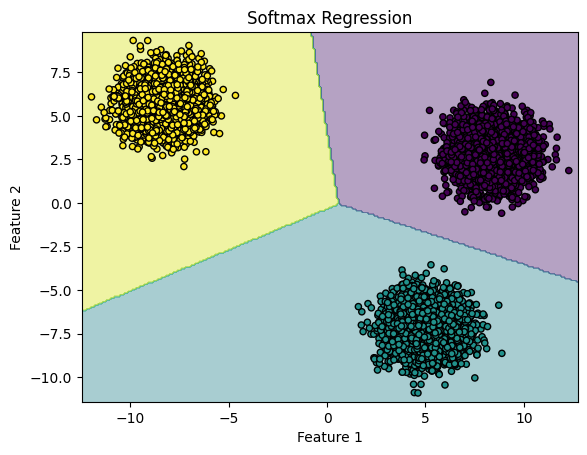

In [14]:
# Plot decision boundary
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.1), torch.arange(y_min, y_max, 0.1))
Z = model(torch.cat((xx.reshape(-1,1), yy.reshape(-1,1)), dim=1)).argmax(dim=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolors='k')
plt.title('Softmax Regression')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()